In [1]:
import os
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import optimize
from matplotlib.pyplot import cm
from lmfit import Model

/home/edi/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def load_dataset(path_folder,verbose=True):
    #path='./db/' # dove sono i file excel
    files = os.listdir(path_folder)
    i = 0
    
    if verbose:
        print('File caricati:')
    
    for file in files:
        if verbose:
            print(file)
        file = path_folder + file
        meta = pd.read_excel(file,sheet_name=0,header=None)
        freq = pd.read_excel(file,sheet_name=1)
        fft = pd.read_excel(file,sheet_name=2)
        
        if i==0:
            a=np.array([meta.iloc[0,1],meta.iloc[3,1]])
            info = pd.DataFrame([a],columns=['run','cavfreq']) # -> Qui tengo le frequenze di cavità 
        
            data = pd.DataFrame({'freq':freq[1],'fft0':fft[1]}) # -> Qui frequenze e fft
            
        else:
            info.loc[len(info)]=list([meta.iloc[0,1],meta.iloc[3,1]])
            
            colname = 'fft' + str(i)
            data[colname]=fft[1]
            
        i += 1
        
        
    info['run'] = pd.to_numeric(info['run'],downcast='integer')
    return data,info

File caricati:
AnalyzedDataFFT_Run_409_sliced.xlsx
AnalyzedDataFFT_Run_407_sliced.xlsx
AnalyzedDataFFT_Run_415_sliced.xlsx
AnalyzedDataFFT_Run_404_sliced.xlsx
AnalyzedDataFFT_Run_413_sliced.xlsx
AnalyzedDataFFT_Run_395_sliced.xlsx
AnalyzedDataFFT_Run_394_sliced.xlsx
AnalyzedDataFFT_Run_401_sliced.xlsx
AnalyzedDataFFT_Run_389_sliced.xlsx
AnalyzedDataFFT_Run_392_sliced.xlsx
AnalyzedDataFFT_Run_399_sliced.xlsx
AnalyzedDataFFT_Run_397_sliced.xlsx
AnalyzedDataFFT_Run_411_sliced.xlsx


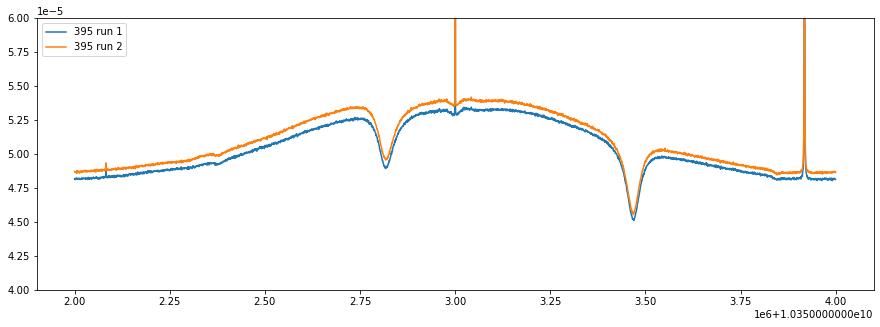

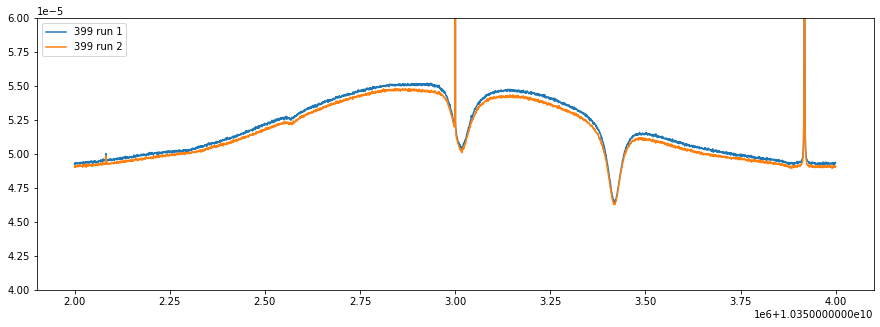

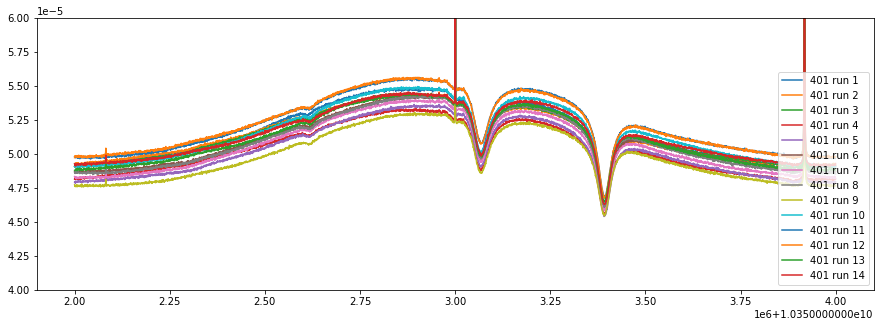

,freq,fft0,fft1,fft2,fft3,fft4,fft5,fft6,fft7,fft8,fft9,fft10,fft11,fft12
0,1.035190e+10,0.000049,0.000048,0.000048,0.000049,0.000048,0.000048,0.000049,0.000049,0.000047,0.000048,0.000049,0.000048,0.000048
1,1.035190e+10,0.000049,0.000048,0.000048,0.000049,0.000048,0.000048,0.000049,0.000049,0.000047,0.000048,0.000049,0.000048,0.000048
2,1.035190e+10,0.000049,0.000048,0.000048,0.000049,0.000048,0.000048,0.000049,0.000049,0.000047,0.000048,0.000049,0.000048,0.000048
3,1.035190e+10,0.000049,0.000048,0.000048,0.000049,0.000048,0.000048,0.000049,0.000049,0.000047,0.000048,0.000049,0.000048,0.000048
4,1.035190e+10,0.000049,0.000048,0.000048,0.000049,0.000048,0.000048,0.000049,0.000049,0.000047,0.000048,0.000049,0.000048,0.000048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3067,1.035390e+10,0.000049,0.000048,0.000048,0.000049,0.000048,0.000048,0.000049,0.000049,0.000047,0.000048,0.000049,0.000048,0.000048
3068,1.035390e+10,0.000049,0.000048,0.000048,0.000049,0.000048,0.000048,0.000049,0.000049,0.000047,0.000048,0.000049,0.000048,0.000048
3069,1.035390e+10,0.000049,0.000048,0.000048,0.000049,0.000048,0.000048,0.000049,0.000049,0.000047,0.000048,0.000049,0.000048,0.000048
3070,1.035390e+10,0.000049,0.000048,0.000048,0.000049,0.000048,0.000048,0.000049,0.000049,0.000047,0.000048,0.000049,0.000048,0.000048


In [3]:
data, info = load_dataset('db/')

# questi fogli hanno diverse run fft, bisogna considerarle tutte?
for j in [395,399,401]:
    meta = pd.read_excel(f'db/AnalyzedDataFFT_Run_{j}_sliced.xlsx',sheet_name=0,header=None)
    freq = pd.read_excel(f'db/AnalyzedDataFFT_Run_{j}_sliced.xlsx',sheet_name=1)
    fft = pd.read_excel(f'db/AnalyzedDataFFT_Run_{j}_sliced.xlsx',sheet_name=2)
    
    plt.figure(figsize=(15,5))
    plt.ylim([4e-5,6e-5])
    for i in fft:
        if i!='SliceNumber':
            plt.plot(freq[1],fft[i],label=f'{j} run {i}')
    plt.legend()
    plt.show()

#prendo solo la prima colonna e la metto in data
data

In [4]:
info

,run,cavfreq
0,409,1.035336e+10
1,407,1.035335e+10
2,415,1.035339e+10
3,404,1.035337e+10
4,413,1.035338e+10
5,395,1.035347e+10
6,394,1.035347e+10
7,401,1.035339e+10
8,389,1.035352e+10
9,392,1.035349e+10


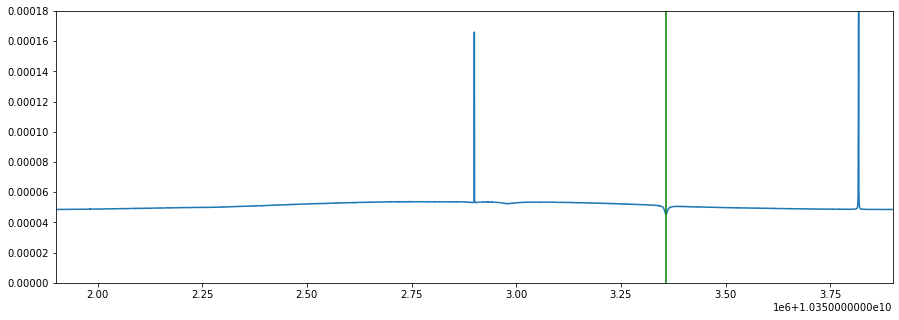

In [5]:
# I dati sono così

plt.figure(figsize=(15,5))
plt.plot(data['freq'],data['fft0'])
#plt.plot(data['freq'],data['fft1'])
#plt.plot(data['freq'],data['fft2'])
#plt.plot(data['freq'],data['fft3'])
#plt.plot(data['freq'],data['fft4'])
#plt.plot(data['freq'],data['fft5'])

plt.vlines(info['cavfreq'][0],0,.00018,'green') # frequenza di cavità
plt.ylim([0,.00018])
plt.xlim([min(data['freq']),max(data['freq'])])
plt.show()

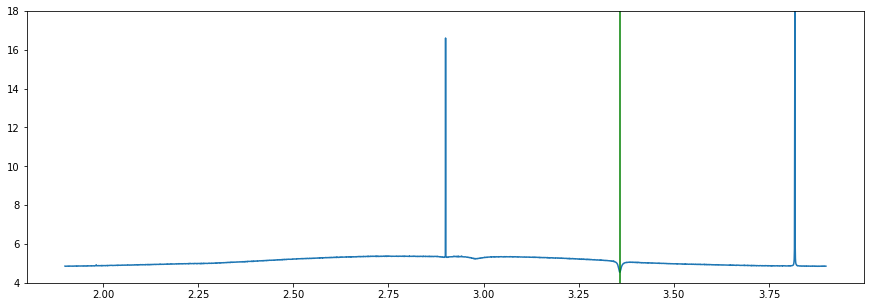

In [6]:
# trasformo le frequenze in Mhz e le traslo così è più semplice lavorare
info['cavfreq'] = (info['cavfreq']/1e9 - 10.35) *1e3
data['freq'] = (data['freq']/1e9 - 10.35) *1e3

# e trasformo anche fft
for name in data:
    if name != 'freq':
        data[name] *= 1e5

# dopo la trasformazione

plt.figure(figsize=(15,5))
plt.plot(data['freq'],data['fft0'])

plt.vlines(info['cavfreq'][0],4,18,'green') # frequenza di cavità
plt.ylim([4,18])
plt.show()

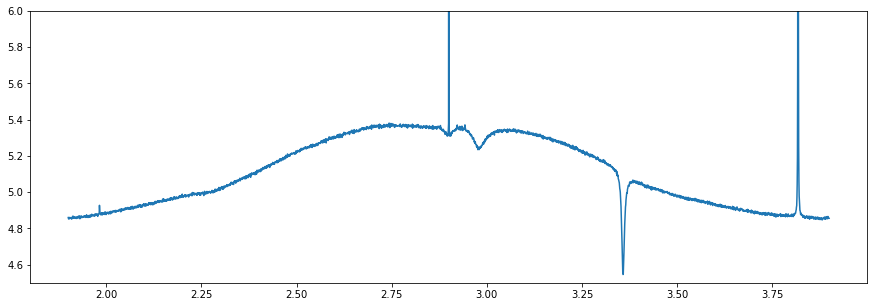

In [7]:
# notare che non è una linea dritta

plt.figure(figsize=(15,5))
plt.plot(data['freq'],data['fft0'])

#plt.vlines(info['cavfreq'][0],4,18,'green') # frequenza di cavità
plt.ylim([4.5,6])
plt.show()

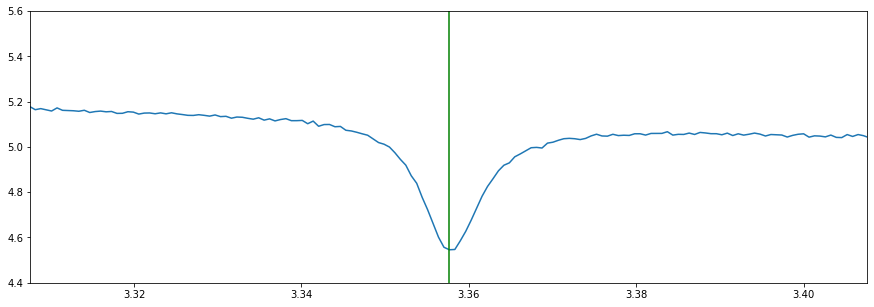

In [8]:
# zoom sulla cavità intorno a delta
delta = .05
center = info['cavfreq'][0]

plt.figure(figsize=(15,5))
plt.plot(data['freq'],data['fft0'])

plt.vlines(center,4,18,'green')
plt.ylim([4.4,5.6])
plt.xlim([center-delta,center+delta])
plt.show()

In [9]:
# ricarico il dataset, altrimenti non è semplice individuare il valore dei parametri in questa nuova trasformazione
data, info = load_dataset('db/',False)

[ 1.03533576e+10  3.93849509e+03  1.03533576e+10  4.17685654e+03
  7.14773705e-03 -1.13877169e-11]


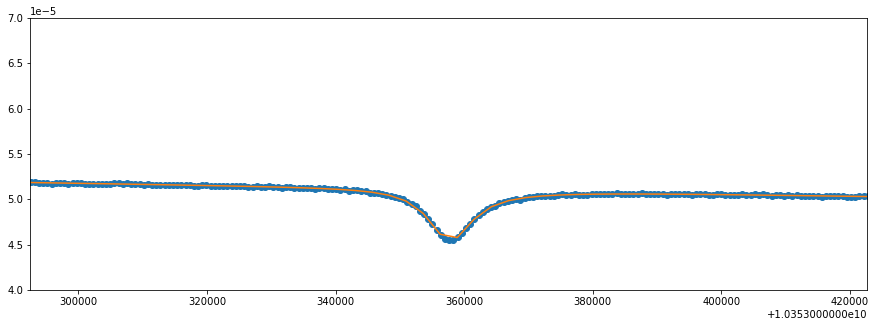

In [10]:
# Fit
def fitm(x,a,b,c,d,e,f):
    return e**2*abs(x-a+1j*b)**2/abs(x-c+1j*d)**2+f*(x-c)

center = info['cavfreq'][0]
fmin,fmax = min(data['freq']),max(data['freq'])
delta = 651
scale = 100    # fattore di scala per lo zoom

plt.figure(figsize=(15,5))
plt.plot(data['freq'],data['fft0'],'o')

#plt.vlines(center,0,6,'green')
#plt.ylim([4,6])
plt.ylim([4e-5,7e-5])
plt.xlim([center-scale*delta,center+scale*delta])
#plt.xlim([fmin,fmax])

# scipy fit
interval = data[(data['freq']>center-scale*delta) & (data['freq']<center+scale*delta)] # finestra intorno alla cavità
param,cov = scipy.optimize.curve_fit(fitm, interval['freq'],interval['fft0'], p0=[center,2e4,center,2.2e4,1e-2,1e-8],maxfev=10_000)
print(param)
a,b,c,d,e,f = param
x=np.linspace(center-scale*delta,center+scale*delta)
#x=np.linspace(fmin,fmax)
plt.plot(x,fitm(x,a,b,c,d,e,f))

plt.show()

In [11]:
fmodel = Model(fitm)
ps = fmodel.make_params(a=center, b=2e4, c=center,d=2.2e4,e=1e-2,f=1e-8)
ps.add('a', value=center, min=center*0.999, max=center*1.01)
ps.add('c', value=center, min=center*0.999, max=center*1.01)

# solo in prossimità della cavità
interval = data[(data['freq']>center-scale*delta) & (data['freq']<center+scale*delta)]

result = fmodel.fit(interval['fft0'],x=interval['freq'], params=ps)#, weights=pesi, x=convx)
#result = fmodel.fit(interval['fft0'],x=interval['freq'], params=ps)#, weights=pesi, x=convx)

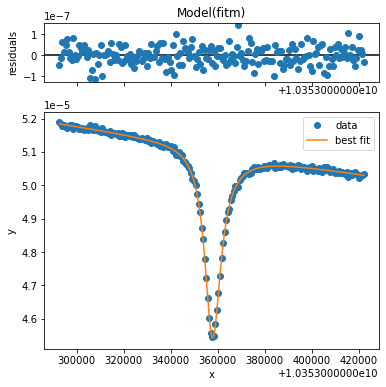

In [12]:
result.plot()
result

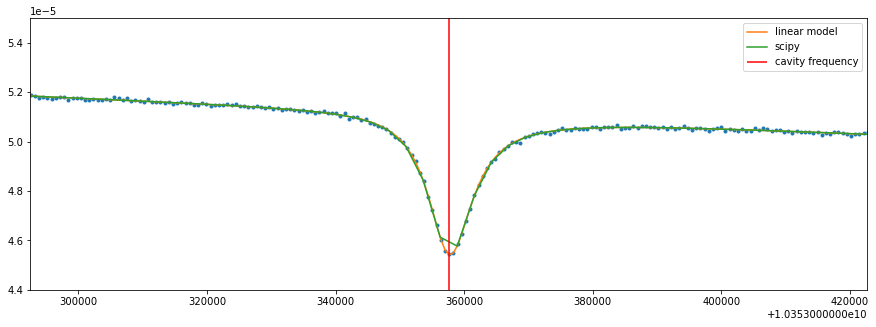

In [13]:
#scale=1
plt.figure(figsize=(15,5))
plt.ylim([4.4e-5,5.5e-5])
plt.xlim([center-scale*delta,center+scale*delta])
#plt.xlim([fmin,fmax])

plt.plot(data['freq'],data['fft0'],'.')
plt.plot(interval['freq'],result.best_fit, label='linear model')
plt.plot(x,fitm(x,a,b,c,d,e,f),label='scipy')
plt.vlines(center,4e-5,6e-5,'red',label='cavity frequency')
#plt.plot(result.init_fit)

plt.legend()

plt.show()

[ 1.03533576e+10  3.94446728e+03  1.03533576e+10  4.18319928e+03
  7.14799771e-03 -1.13703583e-11]
-5.010869896296524e-08


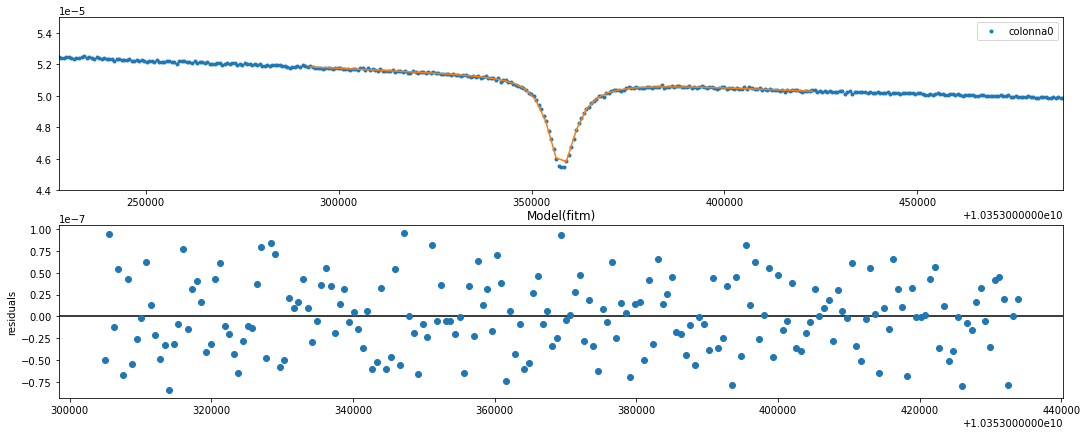

[ 1.03533507e+10  3.92509382e+03  1.03533506e+10  4.15476525e+03
  7.13132095e-03 -1.06954219e-11]
-5.010869896296524e-08


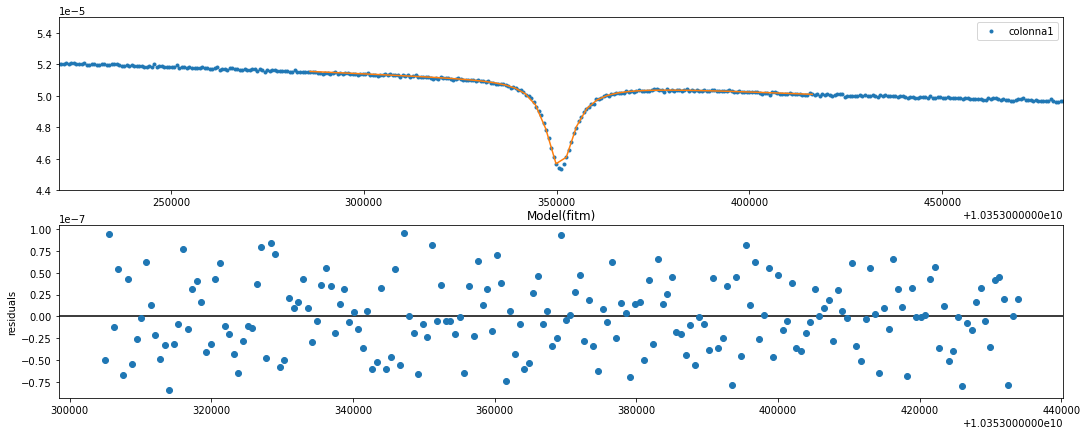

[ 1.03533935e+10  3.90650546e+03  1.03533935e+10  4.13377227e+03
  7.10561413e-03 -1.12692816e-11]
-5.010869896296524e-08


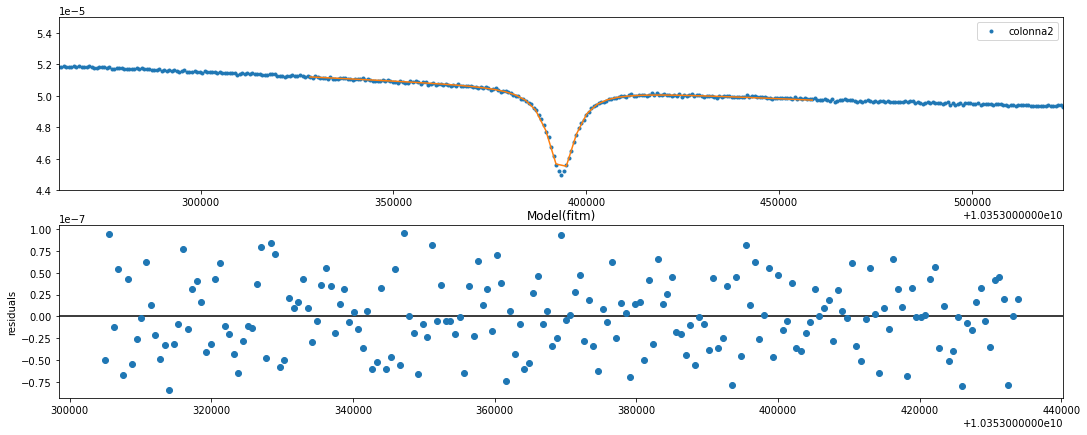

[ 1.03533646e+10  1.95204460e+04  1.03533646e+10  2.07341092e+04
  7.15554604e-03 -8.86205263e-12]
-5.010869896296524e-08


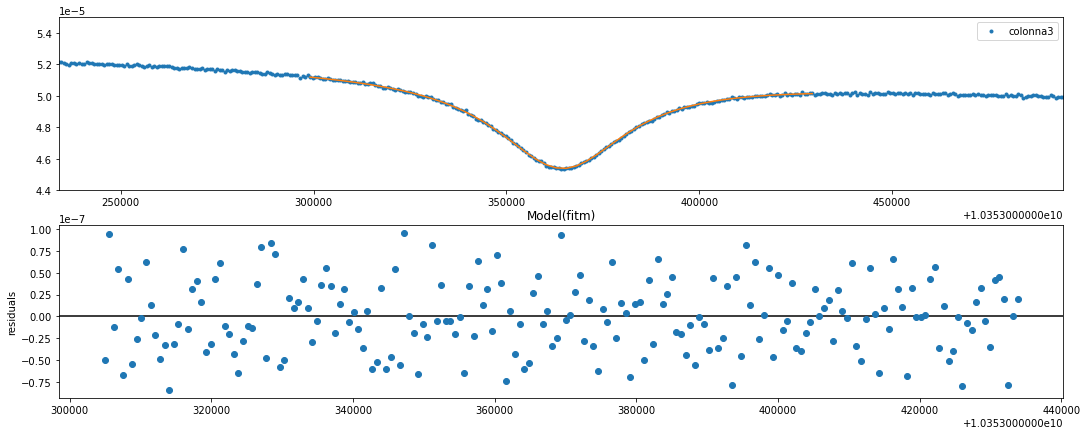

[ 1.03533834e+10  3.91876420e+03  1.03533834e+10  4.13458638e+03
  7.05746543e-03 -1.03856479e-11]
-5.010869896296524e-08


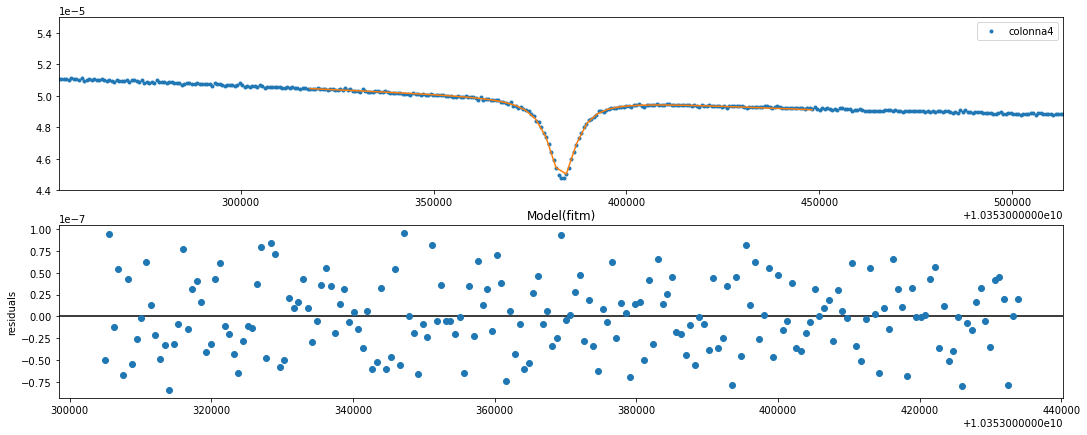

[ 1.03533686e+10  2.00918434e+04  1.03533687e+10  2.12923293e+04
  7.12323240e-03 -9.34673697e-12]
-5.010869896296524e-08


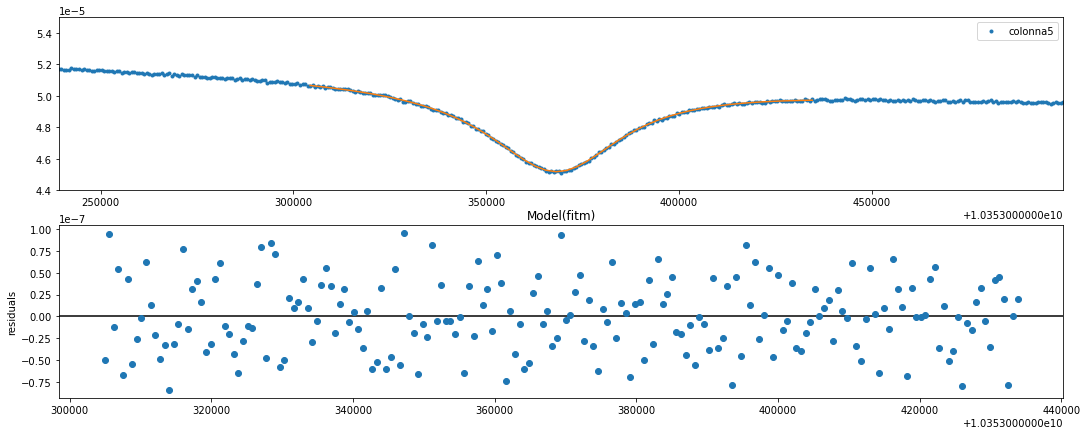

[ 1.03533688e+10  2.02731856e+04  1.03533690e+10  2.14460374e+04
  7.12774730e-03 -8.80905117e-12]
-5.010869896296524e-08


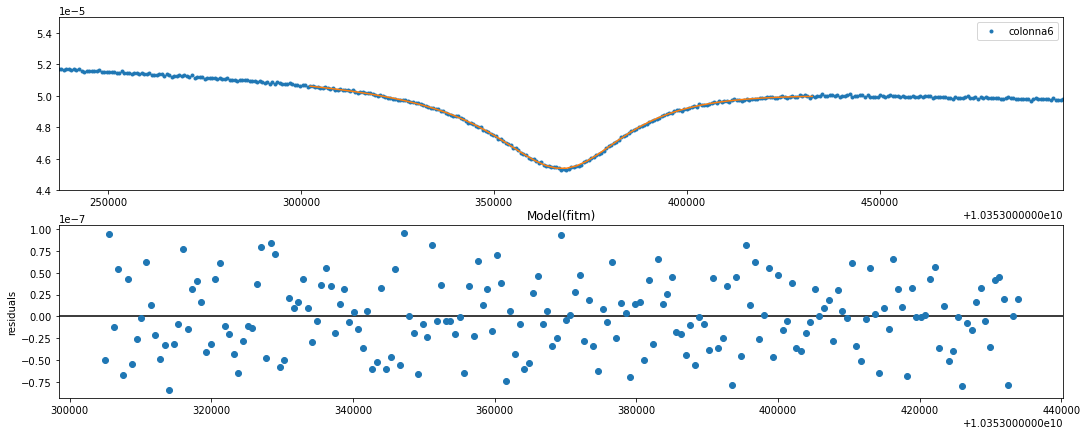

[ 1.03532925e+10  1.66083241e+04  1.03532921e+10  1.76808116e+04
  7.26493940e-03 -1.16670156e-11]
-5.010869896296524e-08


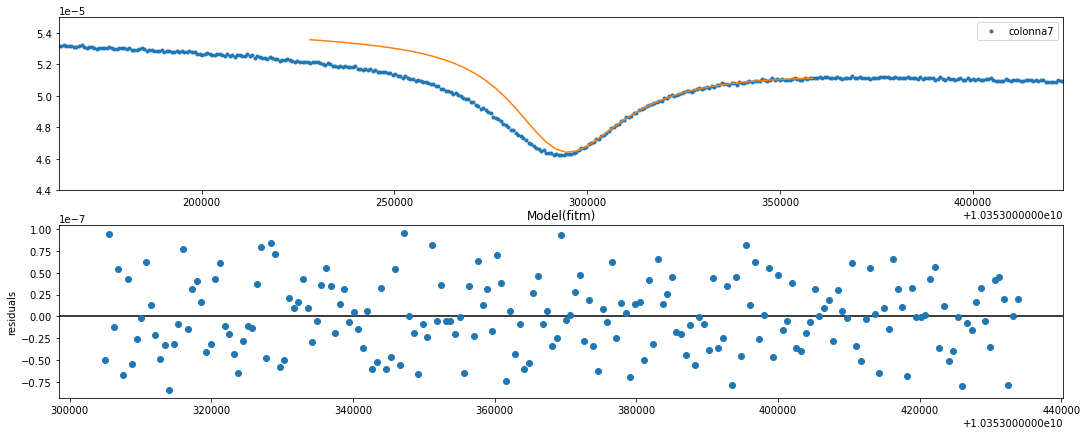

[ 1.03534221e+10  2.10245658e+04  1.03534223e+10  2.21613891e+04
  7.00916134e-03 -7.83108235e-12]
-5.010869896296524e-08


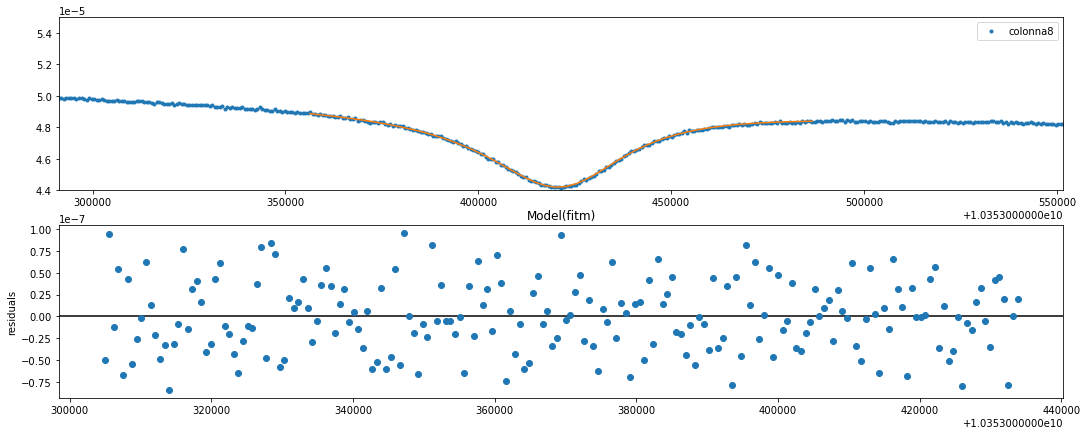

[ 1.03533939e+10  2.08054228e+04  1.03533941e+10  2.20053103e+04
  7.09829461e-03 -8.35297085e-12]
-5.010869896296524e-08


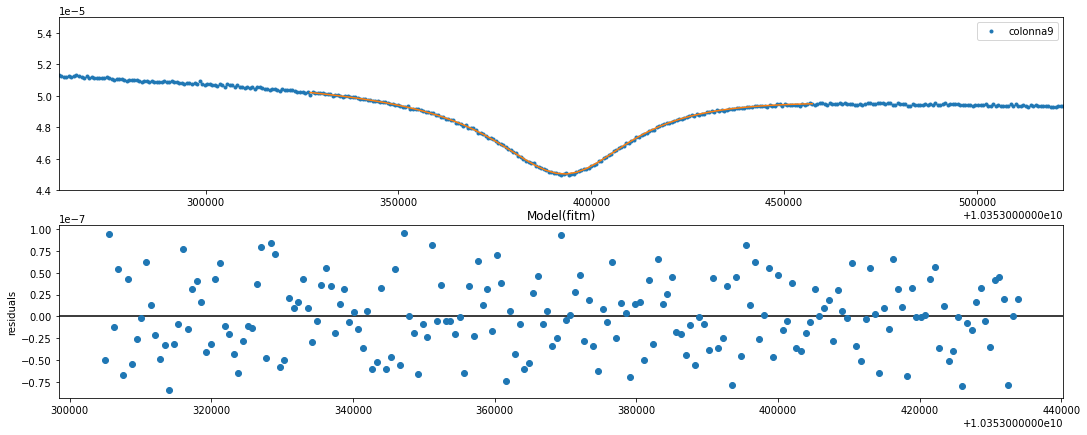

[ 1.03533187e+10  1.99149673e+04  1.03533188e+10  2.11999354e+04
  7.25798091e-03 -1.09161715e-11]
-5.010869896296524e-08


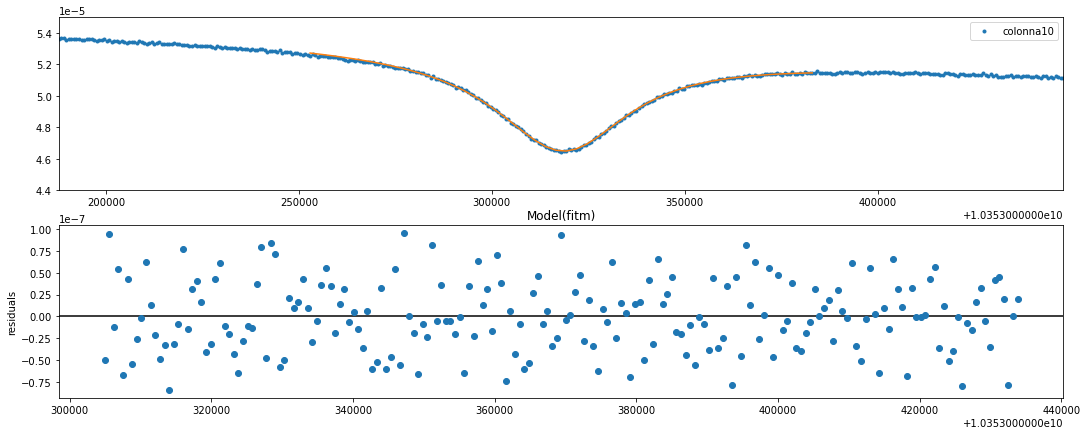

[ 1.03533396e+10  1.97376988e+04  1.03533397e+10  2.08353587e+04
  7.09677276e-03 -1.00186025e-11]
-5.010869896296524e-08


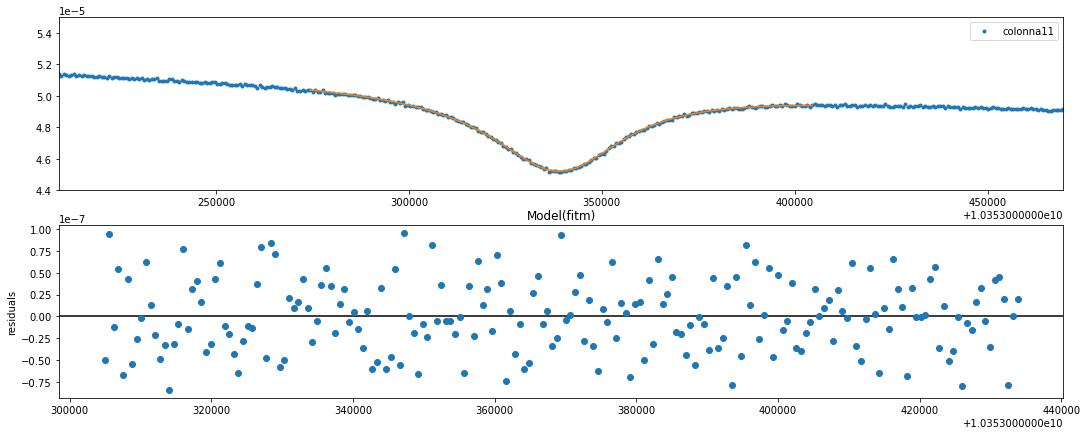

[ 1.03533636e+10  3.88720993e+03  1.03533635e+10  4.11192952e+03
  7.11898585e-03 -1.14904140e-11]
-5.010869896296524e-08


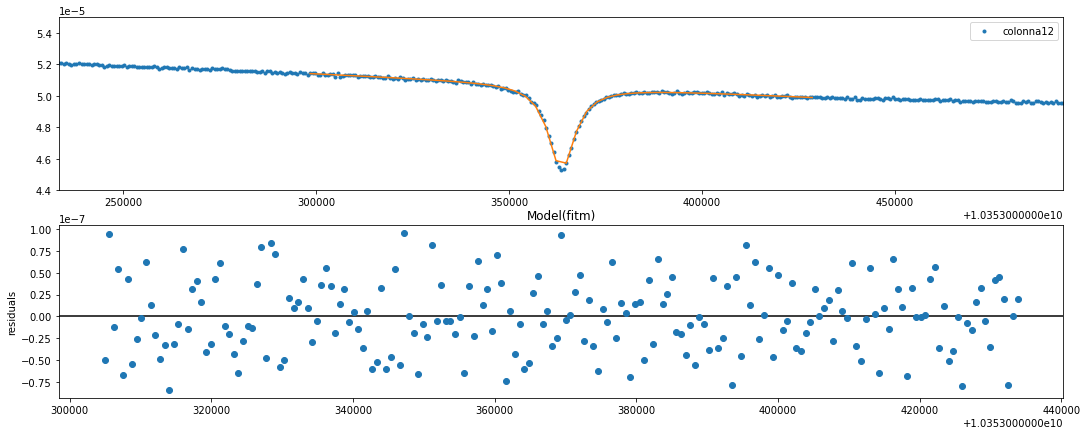

In [22]:
interval = data[(data['freq']>center-scale*delta) & (data['freq']<center+scale*delta)] # finestra intorno alla cavità

for i in range(len(data.iloc[0])-1):
    #center = info['cavfreq'][i]  # errore da 5-10
    center = data['freq'][np.argmin(data[f'fft{i}'])] # errore nel fit del 2 e 7 poco accurato
    
    fig,ax=plt.subplots(2,1,figsize=(18,7))
    ax[0].set_ylim([4.4e-5,5.5e-5])
    ax[0].set_xlim([center-2*scale*delta,center+2*scale*delta])
    
    ax[0].plot(data['freq'],data[f'fft{i}'],'.',label=f'colonna{i}')
    
    # scipy fit
    param,cov = scipy.optimize.curve_fit(fitm, interval['freq'],interval[f'fft{i}'], p0=[center,2e4,center,2.2e4,1e-2,1e-8],maxfev=10_000)
    print(param)
    a,b,c,d,e,f = param
    x=np.linspace(center-scale*delta,center+scale*delta)
    ax[0].plot(x,fitm(x,a,b,c,d,e,f))
    
    #fmodel = Model(fitm)
    #ps = fmodel.make_params(a=center, b=2e4, c=center,d=2.2e4,e=1e-2,f=1e-8)
    #ps.add('a', value=center, min=center*0.999, max=center*1.01)
    #ps.add('c', value=center, min=center*0.999, max=center*1.01)
    #
    #interval = data[(data['freq']>center-scale*delta) & (data['freq']<center+scale*delta)]
    #
    #result = fmodel.fit(interval[f'fft{i}'],x=interval['freq'], params=ps)
    #x=np.linspace(center-scale*delta,center+scale*delta)
    #ax[0].plot(x,fitm(x,a,b,c,d,e,f))
    result.plot_residuals(ax=ax[1])
    #print(f'run{i}',result.eval_uncertainty(x=x))
    #ax[0].vlines(center,4e-5,6e-5,'red',label='cavity frequency')
    print(result.residual[0])
    #ps.pretty_print()
    ax[0].legend()
    plt.show()

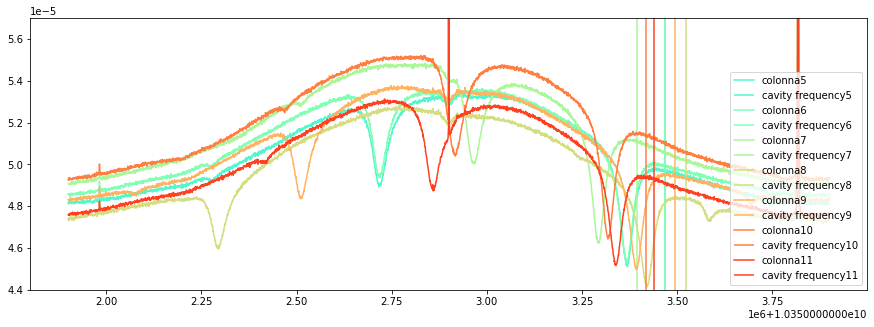

In [15]:
color = cm.rainbow(np.linspace(0, 1, len(info)))

plt.figure(figsize=(15,5))
plt.ylim([4.4e-5,5.7e-5])

for i in range(5,12):
    
    center=info['cavfreq'][i]

    plt.plot(data['freq'],data[f'fft{i}'],'-',label=f'colonna{i}',color=color[i])
    plt.vlines(center,4e-5,6e-5,'red',label=f'cavity frequency{i}',color=color[i])
    
    
plt.legend()
plt.show()

,0,1
0,Run Number,4.130000e+02
1,Conjugated Thermal Noise Input Run,4.120000e+02
2,L.O. Frequency (Hz),1.035290e+10
3,Cavity Frequency (Hz),1.035338e+10
4,Cavity Q,1.236324e+06
5,Beta,2.890000e+00
6,Approximate Cavity Temperature (K),1.130000e-01
7,Number of analyzed files in run (each correspo...,5.010000e+02
8,Number of analyzed files in each slice,5.000000e+02


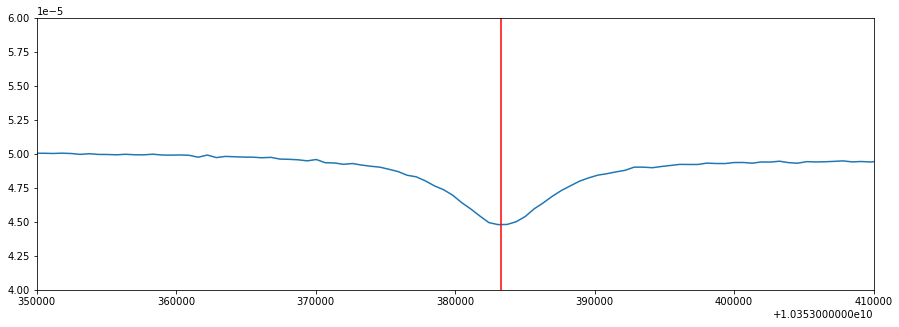

In [16]:
meta = pd.read_excel('db/AnalyzedDataFFT_Run_413_sliced.xlsx',sheet_name=0,header=None)
freq = pd.read_excel('db/AnalyzedDataFFT_Run_413_sliced.xlsx',sheet_name=1)
fft = pd.read_excel('db/AnalyzedDataFFT_Run_413_sliced.xlsx',sheet_name=2)

plt.figure(figsize=(15,5))
plt.ylim([4e-5,6e-5])
plt.xlim([1.035338e+10-30000,1.035338e+10+30000])
plt.plot(freq[1],fft[1])
#plt.vlines(1.035338e+10,4e-5,6e-5,'red',label=f'cavity frequency{i}',color=color[i])
plt.vlines(meta[1][3],4e-5,6e-5,'red')#,label=f'cavity frequency{i}',color=color[i])

meta

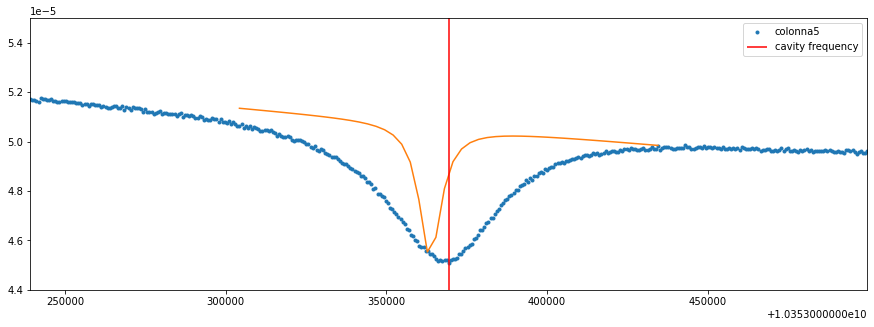

In [17]:
center = data['freq'][np.argmin(data['fft5'])]

plt.figure(figsize=(15,5))
plt.ylim([4.4e-5,5.5e-5])
plt.xlim([center-2*scale*delta,center+2*scale*delta])

plt.plot(data['freq'],data['fft5'],'.',label='colonna5')

fmodel = Model(fitm)
ps = fmodel.make_params(a=center, b=2e4, c=center,d=2.2e4,e=1e-2,f=1e-8)
ps.add('a', value=center, min=center*0.999, max=center*1.01)
ps.add('c', value=center, min=center*0.999, max=center*1.01)

interval = data[(data['freq']>center-scale*delta) & (data['freq']<center+scale*delta)]

result = fmodel.fit(interval['fft5'],x=interval['freq'], params=ps)
x=np.linspace(center-scale*delta,center+scale*delta)
plt.plot(x,fitm(x,a,b,c,d,e,f))

plt.vlines(center,4e-5,6e-5,'red',label='cavity frequency')

plt.legend()
plt.show()

In [18]:
# errore nel minimo
info.iloc[5:11]

,run,cavfreq
5,395,1.035347e+10
6,394,1.035347e+10
7,401,1.035339e+10
8,389,1.035352e+10
9,392,1.035349e+10
10,399,1.035342e+10


In [19]:
# errore nel fit scipy
info.iloc[[2,7]]

,run,cavfreq
2,415,1.035339e+10
7,401,1.035339e+10
